In [39]:
%pip install kagglehub
%pip install pandas
%pip install seaborn 
%pip install sklearn
%pip install shutil
%pip install scikit-learn

# samo prvi put usporava svaki naredni put skriptu...

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


Note: you may need to restart the kernel to use updated packages.


In [40]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import mean_absolute_error 

path = kagglehub.dataset_download("thedevastator/weather-prediction")

In [33]:
local_dir = "./tmp/"
local_output_dir = "./output/"
os.makedirs(local_dir, exist_ok=True)
os.makedirs(local_output_dir, exist_ok=True)

csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
first_csv = ""
if csv_files:
    first_csv = csv_files[1]
    print("Prvi CSV fajl:", first_csv)

    local_path = os.path.join(local_dir, first_csv)
    shutil.copy(os.path.join(path, first_csv), local_path)

    print(f"Fajl je preuzet u: {local_path}")

    df = pd.read_csv(local_path)
    df.head()

Prvi CSV fajl: weather_prediction_dataset.csv
Fajl je preuzet u: ./tmp/weather_prediction_dataset.csv


,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


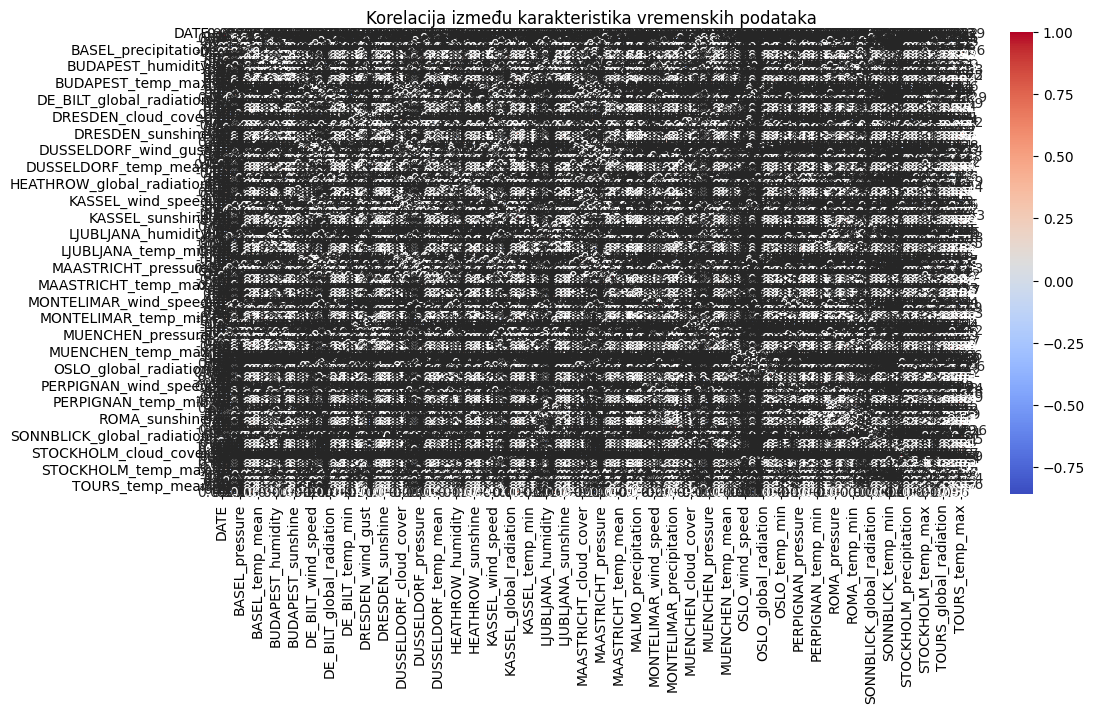

Mean Absolute Error: 0.05371134720931886


In [34]:
 
df = pd.read_csv(f"{path}/{first_csv}")  
 
display(df.head()) 
df.info()

# Vizualizacija raspodele podataka
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelacija između karakteristika vremenskih podataka")
plt.show()
 
df = df.dropna()   
 

X = df.drop(columns=["TOURS_temp_max"])  
y = df["TOURS_temp_max"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluacija modela
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


In [35]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

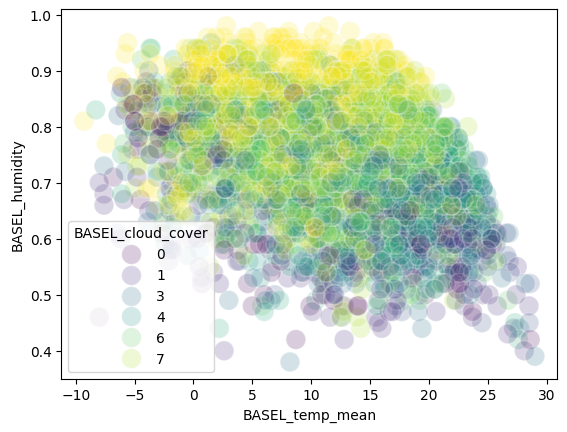

In [36]:
sns.scatterplot(
    x='BASEL_temp_mean', 
    y='BASEL_humidity', 
    data=df, 
    hue='BASEL_cloud_cover', 
    palette='viridis', 
    s=200, 
    alpha=0.2
)
plt.show()

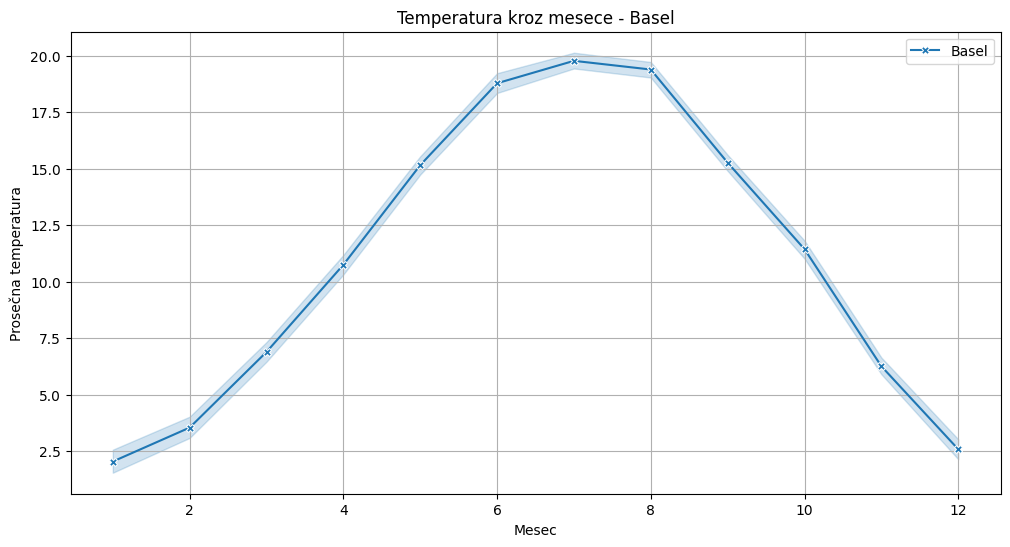

In [ ]:
if "MONTH" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df["MONTH"], y=df["BASEL_temp_mean"], marker="X", label="Basel")
    
    plt.xlabel("Mesec")
    plt.ylabel("Prosecna temperura")
    plt.title("Temperatura kroz mesece - Basel")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Kolona 'MONTH' ne postoji u datasetu.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


None

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,...,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,...,7.250744,8.950217,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,...,-19.700000,-14.500000,0.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,...,0.000000,4.100000,2.600000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,...,5.000000,11.000000,3.400000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,...,11.200000,19.000000,4.600000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,...,21.200000,32.900000,10.800000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


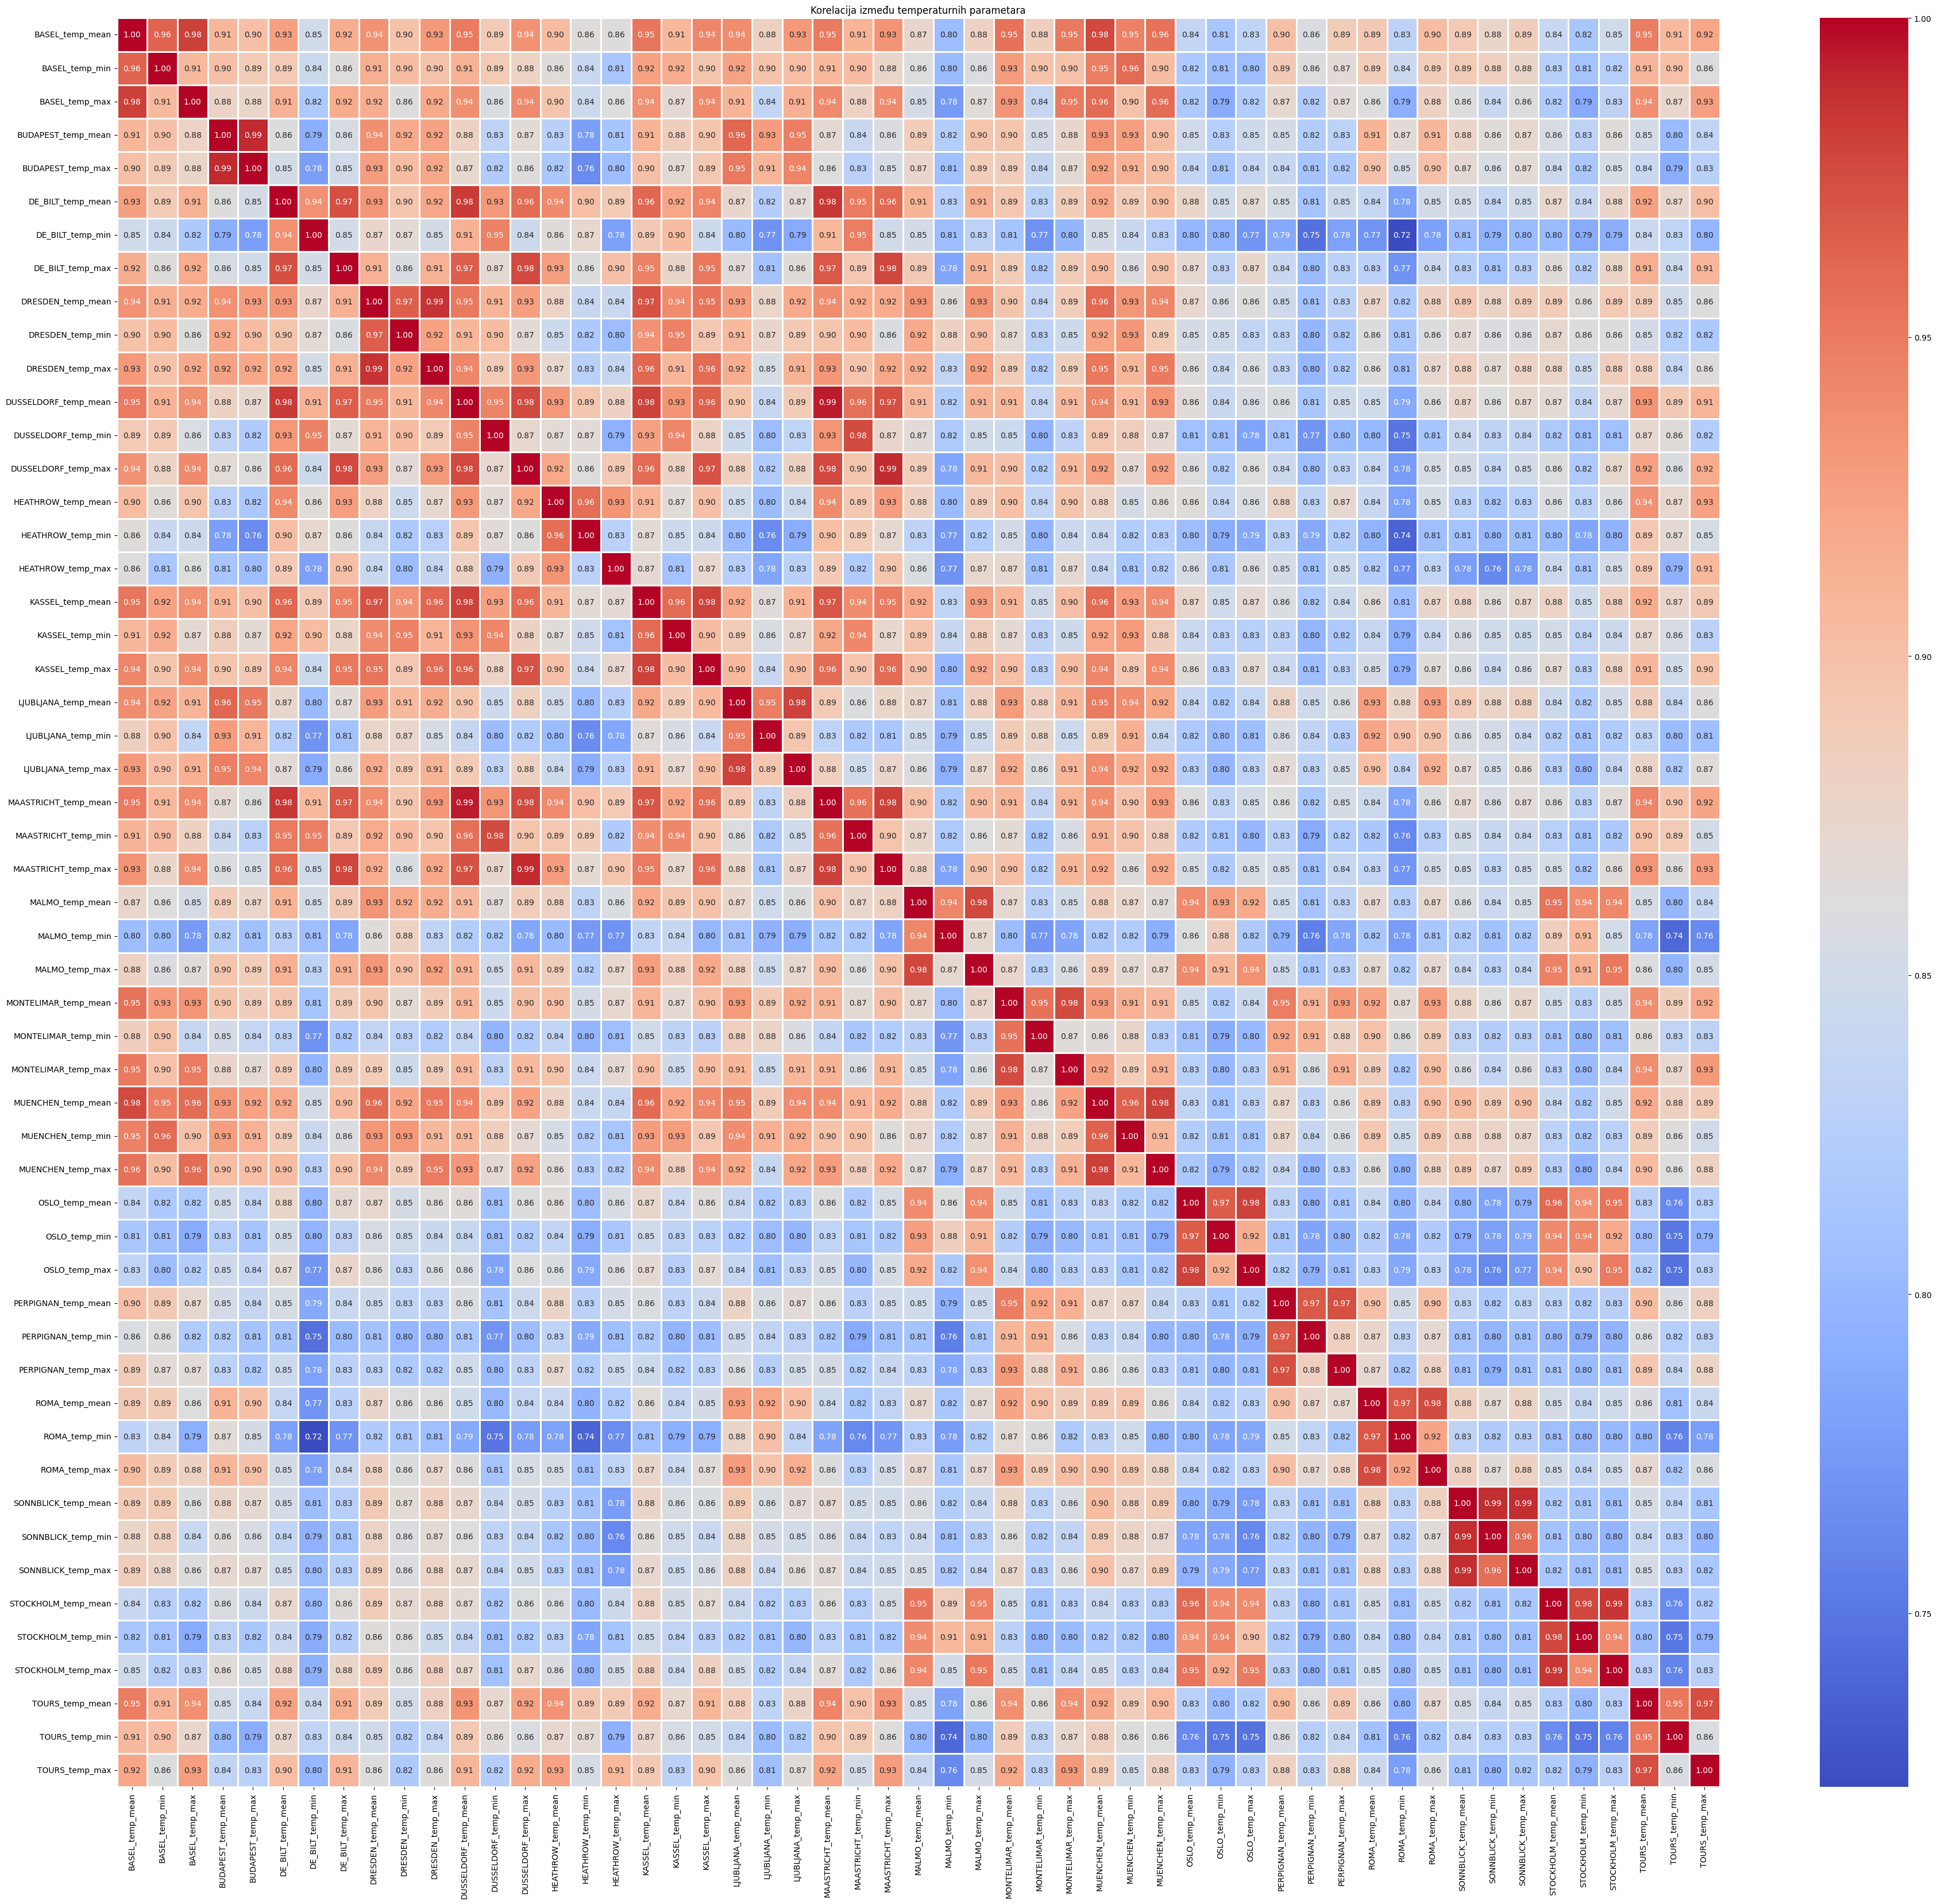

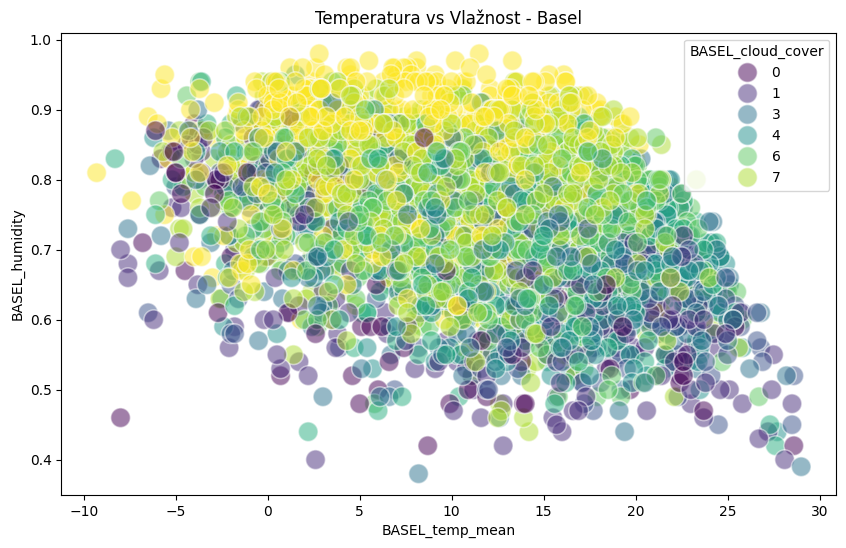

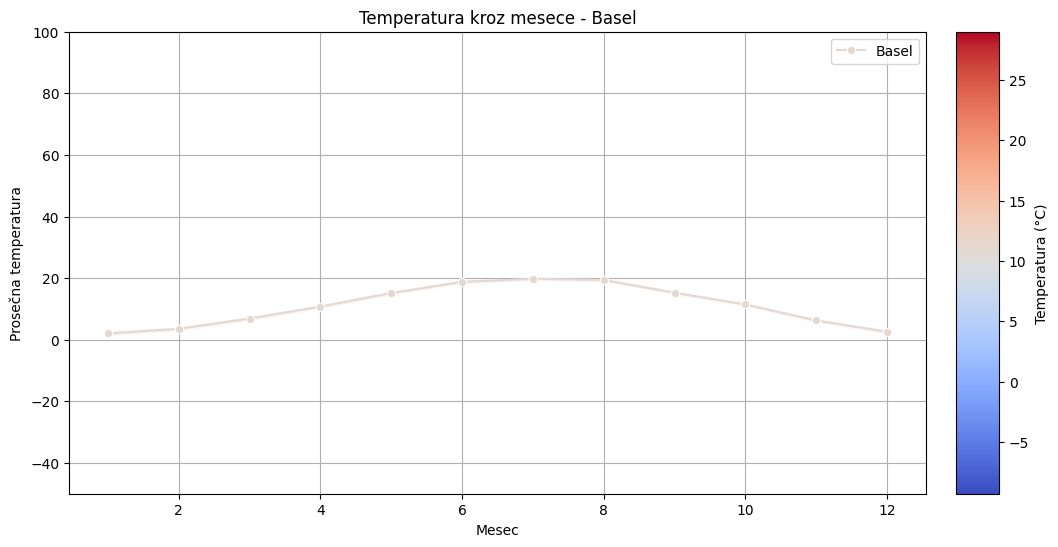

Mean Absolute Error: 0.37238266053659563


In [ ]:

display(df.info())
display(df.describe())

temp_columns = [col for col in df.columns if "temp" in col.lower()]
df_temp = df[temp_columns]

plt.figure(figsize=(45, 40)) 
sns.heatmap(df_temp.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.8)
plt.title("Korelacija između temperaturnih parametara")
 
plt.savefig("./output/output1.png", dpi=300, bbox_inches='tight')
plt.show()

if "BASEL_temp_mean" in df.columns and "BASEL_humidity" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='BASEL_temp_mean', y='BASEL_humidity', data=df, hue='BASEL_cloud_cover', palette='viridis', s=200, alpha=0.5)
    plt.title("Temperatura vs Vlažnost - Basel")
 
    plt.savefig("./output/output2.png", dpi=300, bbox_inches='tight')
    plt.show()

if "MONTH" in df.columns and "BASEL_temp_mean" in df.columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    norm = plt.Normalize(df["BASEL_temp_mean"].min(), df["BASEL_temp_mean"].max())
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])

    sns.lineplot(x=df["MONTH"], y=df["BASEL_temp_mean"], marker="o", label="Basel", color=plt.cm.coolwarm(norm(df["BASEL_temp_mean"].mean())), ax=ax)

    plt.xlabel("Mesec")
    plt.ylabel("Prosečna temperatura")
    plt.title("Temperatura kroz mesece - Basel")
    plt.legend()
    plt.grid(True)
    plt.ylim(-50, 100)

    # Ispravna metoda za dodavanje colorbara
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.3)
    plt.colorbar(sm, cax=cax, label="Temperatura (°C)")
    
    plt.savefig("./output/output3.png", dpi=300, bbox_inches='tight')
    plt.show()
 
# Predobrada podataka (Uklanjanje nedostajućih vrednosti)
df = df.dropna()

# Kreiranje modela (linearna regresija za predikciju temperature)
X = df.drop(columns=["BASEL_temp_mean"])
y = df["BASEL_temp_mean"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluacija modela
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
